# Project : Prediction of the Crude Oil production trend


## l. Import the libraries 

load all useful python modules :

In [1]:
# Basic import numpy, pandas and matplotlib :
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.random as npr
import matplotlib.cm as cm

# dimentionality reduction imports :
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# useful build-in python functions
from sklearn import metrics
from sklearn.pipeline import Pipeline


#Import classification algorithms :
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

/Users/benjelloun/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## ll. Get the dataset

We load the dataset from the given files (link to the computer)

In [2]:
#_______ Links to the data 

# link to Train inputs :
link_Train_input  = '/Users/benjelloun/Desktop/Challenge/Train_Input.csv'
# link to Train output :
link_Train_output = '/Users/benjelloun/Desktop/Challenge/Training_Output.csv'
# link to Test inputs :
link_Test_input   = '/Users/benjelloun/Desktop/Challenge/Test.csv'

#_______ Open the files 
#Train_Outputs :
Train_Outputs = pd.read_csv(link_Train_output, sep = ";")
#Train_Inputs :
Train_Input = pd.read_csv(link_Train_input, sep = ";")
#Test Input :
Test_Input = pd.read_csv(link_Test_input, sep = ";")

## III. Preprocessing

## Hands on data :

In [3]:
#Get train input data shape
print('Input Train data shape is :', Train_Input.shape)
#Get train output data shape
print('Output Train data shape is :', Train_Outputs.shape)
#Get the types present in the data
print('the types present in the dataset :', pd.unique( Train_Input.iloc[:,1:].dtypes ) )


Input Train data shape is : (10159, 123)
Output Train data shape is : (10159, 2)
the types present in the dataset : [dtype('int64') dtype('float64')]


In [4]:
# Get a first idea of what looks the data like 
print( Train_Input.iloc[0] )

ID                                ID00001
month                                   5
country                                52
1_diffClosing stocks(kmt)               0
1_diffExports(kmt)                    237
1_diffImports(kmt)                      0
1_diffRefinery intake(kmt)             33
1_diffWTI                           -5.62
1_diffSumClosing stocks(kmt)      10426.2
1_diffSumExports(kmt)             12135.1
1_diffSumImports(kmt)             20527.8
1_diffSumProduction(kmt)          32234.6
1_diffSumRefinery intake(kmt)     25998.8
2_diffClosing stocks(kmt)               0
2_diffExports(kmt)                   -159
2_diffImports(kmt)                      0
2_diffRefinery intake(kmt)            -17
2_diffWTI                           -5.05
2_diffSumClosing stocks(kmt)        -3510
2_diffSumExports(kmt)                1124
2_diffSumImports(kmt)            -6034.04
2_diffSumProduction(kmt)          -2105.3
2_diffSumRefinery intake(kmt)    -7860.37
3_diffClosing stocks(kmt)         

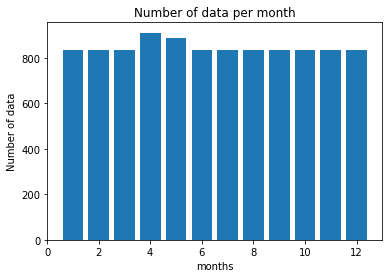

In [5]:
## number of data per month :

#get the statistic
data_by_month = []
for i in range(1,13):
    data_by_month.append([i, np.sum(Train_Input.iloc[:, 1]==i)] )
data_by_month = np.array(data_by_month)

#bar plot :
fig1 = plt.figure()
plt.bar(data_by_month[:,0], data_by_month[:,1], align='center')
plt.ylabel('Number of data')
plt.xlabel('months')
plt.title('Number of data per month')
plt.show()

number of countries is  76


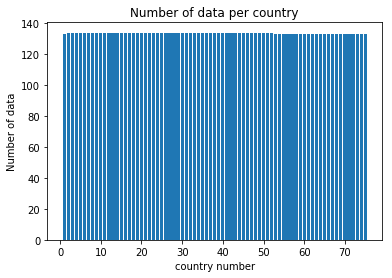

In [6]:
## number of data per country
#number of countries :
number_of_countries = len(np.unique(Train_Input.iloc[:, 2]))
print('number of countries is ', number_of_countries)

#Get the statistics
data_per_country = []
for i in range(1, number_of_countries):
    data_per_country.append([i, np.sum(Train_Input.iloc[:, 2]==i) ])
data_per_country = np.array(data_per_country)

# bar plot :
fig2 = plt.figure()
plt.bar(data_per_country[:,0], data_per_country[:,1], align='center')
plt.ylabel('Number of data')
plt.xlabel('country number')
plt.title('Number of data per country')
plt.show()

In [7]:
#Get the list of features :
list(Train_Input)

['ID',
 'month',
 'country',
 '1_diffClosing stocks(kmt)',
 '1_diffExports(kmt)',
 '1_diffImports(kmt)',
 '1_diffRefinery intake(kmt)',
 '1_diffWTI',
 '1_diffSumClosing stocks(kmt)',
 '1_diffSumExports(kmt)',
 '1_diffSumImports(kmt)',
 '1_diffSumProduction(kmt)',
 '1_diffSumRefinery intake(kmt)',
 '2_diffClosing stocks(kmt)',
 '2_diffExports(kmt)',
 '2_diffImports(kmt)',
 '2_diffRefinery intake(kmt)',
 '2_diffWTI',
 '2_diffSumClosing stocks(kmt)',
 '2_diffSumExports(kmt)',
 '2_diffSumImports(kmt)',
 '2_diffSumProduction(kmt)',
 '2_diffSumRefinery intake(kmt)',
 '3_diffClosing stocks(kmt)',
 '3_diffExports(kmt)',
 '3_diffImports(kmt)',
 '3_diffRefinery intake(kmt)',
 '3_diffWTI',
 '3_diffSumClosing stocks(kmt)',
 '3_diffSumExports(kmt)',
 '3_diffSumImports(kmt)',
 '3_diffSumProduction(kmt)',
 '3_diffSumRefinery intake(kmt)',
 '4_diffClosing stocks(kmt)',
 '4_diffExports(kmt)',
 '4_diffImports(kmt)',
 '4_diffRefinery intake(kmt)',
 '4_diffWTI',
 '4_diffSumClosing stocks(kmt)',
 '4_diffSu

## Statistics of the missing data :

In [8]:
#Check is the dataset Train_Input contains NAN values :
Train_Input.isnull().any()

ID                                False
month                             False
country                           False
1_diffClosing stocks(kmt)          True
1_diffExports(kmt)                False
1_diffImports(kmt)                 True
1_diffRefinery intake(kmt)        False
1_diffWTI                         False
1_diffSumClosing stocks(kmt)      False
1_diffSumExports(kmt)             False
1_diffSumImports(kmt)             False
1_diffSumProduction(kmt)          False
1_diffSumRefinery intake(kmt)     False
2_diffClosing stocks(kmt)          True
2_diffExports(kmt)                False
2_diffImports(kmt)                 True
2_diffRefinery intake(kmt)        False
2_diffWTI                         False
2_diffSumClosing stocks(kmt)      False
2_diffSumExports(kmt)             False
2_diffSumImports(kmt)             False
2_diffSumProduction(kmt)          False
2_diffSumRefinery intake(kmt)     False
3_diffClosing stocks(kmt)          True
3_diffExports(kmt)                False


In [9]:
#Check is the dataset Train_Outputs contains NAN values :
Train_Outputs.isnull().any()

ID        False
Target    False
dtype: bool

In [10]:
#Check is the dataset Test_Inputs contains NAN values :
np.unique(Test_Input.isnull().any())

array([False], dtype=bool)

We have missing data in the training inputs, no missing data in the test set and training outputs !

In [11]:
#Counting cells with missing data :
print( 'Number of cells in Train_Input with missing data is : ', sum(Train_Input.isnull().values.ravel()) )

#Counting rows that have missing values somewhere :
print( 'Number of rows in Train_Input with missing data is : ', sum([True for idx,row in Train_Input.iterrows() if any(row.isnull())]) )

Number of cells in Train_Input with missing data is :  4497
Number of rows in Train_Input with missing data is :  294


The countries with missing data are : 

the country  33  has  288 missing values
the country  41  has  825 missing values
the country  42  has  1524 missing values
the country  71  has  1860 missing values




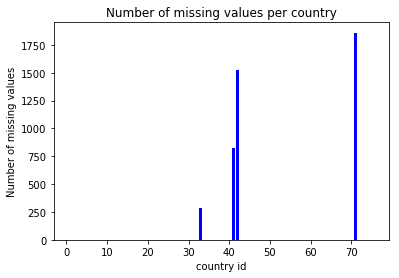

In [12]:
## missing values per country
missing_data_per_country = []
for i in np.arange(1, len(np.unique(Train_Input.iloc[:, 2]))):
    missing_data_per_country.append([i, sum( Train_Input[ Train_Input['country'] == i].isnull().values.ravel()) ])
missing_data_per_country = np.array(missing_data_per_country)

#_Print the countries with missing values :
print('The countries with missing data are : \n')
for i in range(0, len(missing_data_per_country)):
    if missing_data_per_country[i,1] != 0 :
        print('the country ', missing_data_per_country[i,0], ' has ', missing_data_per_country[i,1], 'missing values')
print('\n')

#_Diragram showing the number of missing values per country
plt.bar(missing_data_per_country[:,0], missing_data_per_country[:,1], color="blue")
plt.ylabel('Number of missing values')
plt.xlabel('country id')
plt.title('Number of missing values per country')
plt.show()

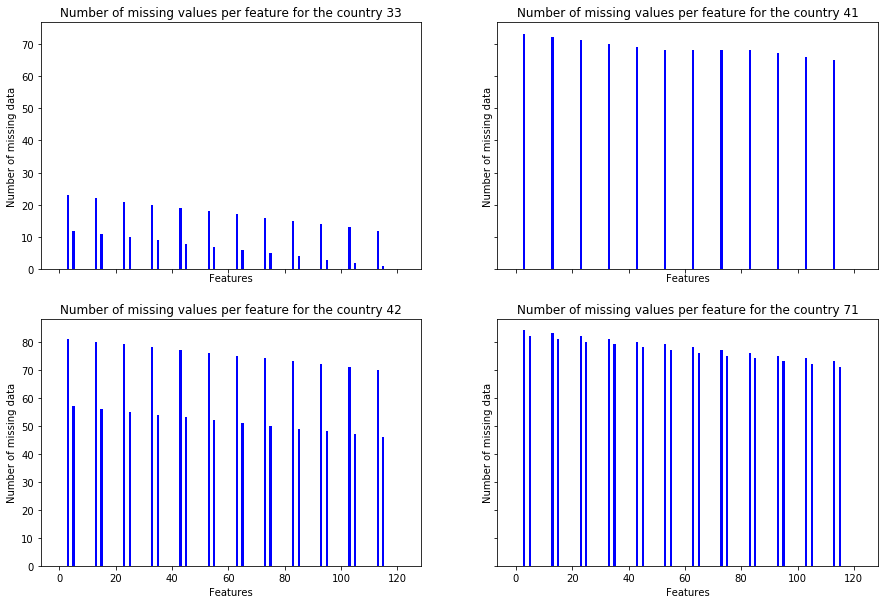

In [13]:
## Get the distribution of features with missing data for the selected countries

countries_missing = [33, 41, 42, 71] #countries with mising data
Missing_data_per_features ={} #dictionnary in order to get the statistics about missing data/feature
Features_list = list(Train_Input) #list of features

#Fill the dictionnary with the number of missing data per feature :
for country in countries_missing : #loop over the features
    
    selected_country = Train_Input['country']==country #coundition to select data for the following country
    Missing_data_per_features[country] = [[Feature, int(sum(Train_Input[selected_country][Feature].isnull().values.ravel()))] \
                                          for Feature in Features_list]
    Missing_data_per_features[country] = np.array(Missing_data_per_features[country])


#plot the number of missing data per feature for each country :
x = range(len(Features_list))
# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15, 10))

ax1.bar(x, list(map(int, Missing_data_per_features[33][:,1])), color="blue", align='center')
ax1.set_title('Number of missing values per feature for the country 33')
ax1.set_xlabel('Features')
ax1.set_ylabel('Number of missing data')

ax2.bar(x, list(map(int, Missing_data_per_features[41][:,1])), color="blue", align='center')
ax2.set_title('Number of missing values per feature for the country 41')
ax2.set_xlabel('Features')
ax2.set_ylabel('Number of missing data')

ax3.bar(x, list(map(int, Missing_data_per_features[42][:,1])), color="blue", align='center')
ax3.set_title('Number of missing values per feature for the country 42')
ax3.set_xlabel('Features')
ax3.set_ylabel('Number of missing data')

ax4.bar(x, list(map(int, Missing_data_per_features[71][:,1])), color="blue", align='center')
ax4.set_title('Number of missing values per feature for the country 71')
ax4.set_xlabel('Features')
ax4.set_ylabel('Number of missing data')

plt.show()

## Replace the missing values :

In order to replace the missing data we will follow the strategy :

    1. If the data missing os highly correlated to the country : closing_stocks, exports/imports, refinery intake, WTI. we will replace using the mean of the this features in the same country for the selected month.
    
    2. If the data missing depends on all the countries i.e starting with sum we will fill using a mean of this feature over all the countries for the corresponding month.

    

In [14]:
def Fill_Missing_values(Train_Input, country_list):
    
    for country in country_list :
    
        Country_data = Train_Input[Train_Input['country']==country]
        indexes = list(Country_data.index) #row indexes of Country_data
        #Get indexes of missing values :
        missing_x, missing_y = np.where(pd.isnull(Country_data))
        
        for i in range(len(missing_x)):
            x,y = missing_x[i], missing_y[i]
            #if the feature depends only on the country :
            if "Sum" not in list(Country_data)[y] :
                # First we get the subset of elements with the same month of the missing data point:
                same_month_condition = Country_data['month'] == Country_data.iloc[x,1] 
                same_month_data = Country_data[same_month_condition]   
                # Fill in with the mean value (take care to not consider the missing values) :
                Train_Input.at[indexes[x], list(Country_data)[y]] = np.mean([ same_month_data.iloc[:,y].dropna() ])
            
                #if the feature depends on all the countries i.e sum is in the column name :
            if "Sum" in list(Country_data)[y] :    
                # First get the subset of elements for the same month from all the dataset:
                same_month_condition = Train_Input[Train_Input['month']] == Country_data.iloc[x,1]                          
                same_month_data =  Train_Input[same_month_condition]
                # Fill in with the mean value over all the dataset
                Train_Input.at[indexes[x], list(Country_data)[y]] = np.mean([ same_month_data.iloc[:,y].dropna() ]) 
        
        print('Fill_Missing_values performed for the country', country, ':) \n')
    return

In [15]:
# Fill the missing values in the dataset :
country_list = [33, 41, 42, 71]
Fill_Missing_values(Train_Input, country_list)
# Secutiry check : see if the data has been replaced :
print('Security check : \n')
for country in country_list :
    print('the number of missing data in ', country, ' is :', sum( Train_Input[ Train_Input['country'] == country].isnull().values.ravel()) )
    
print('Total number of missing data in the dataset is : ', sum( Train_Input.isnull().values.ravel()))

Fill_Missing_values performed for the country 33 :) 

Fill_Missing_values performed for the country 41 :) 

Fill_Missing_values performed for the country 42 :) 

Fill_Missing_values performed for the country 71 :) 

Security check : 

the number of missing data in  33  is : 0
the number of missing data in  41  is : 0
the number of missing data in  42  is : 0
the number of missing data in  71  is : 0
Total number of missing data in the dataset is :  0


## lV. Visualization of the data 

We will visualize the data per country/month using two different algorithms :

    1. PCA : a linear transformation that maximize the variance.

    2. t-SNE : a non linear transformation that works well with high dimensional data, it preserves the distances between the data in the new space.

Multiple dimentionnality reduction methods are available, for an exhaustif discussion please se [Colah's blog](http://colah.github.io/posts/2014-10-Visualizing-MNIST/).

Note : the algorithm should ignore the country/id/month data !

In [16]:
'''
 ***Inputs :
    - Train_Input : All the dataset
    - show_by_months : bool (true or false) to determine if we want to see the distribution per month
    - selected_months : list of months that we want to consider if select_per_month==True
    - show_by_countries : bool (true or false) to determine if we want to see the distribution per country
    - selected_countries : list of countries that we want to consider if select_per_countries==True
    - figure_size : size of the figure = (5,5) by default
    
    *** Note : if show_per_month is always different than show_by_countries : 
'''

def plot_pca_distribution_per_country(Train_Input, 
                                      show_by_months, selected_months,
                                      show_by_countries, selected_countries,
                                      figure_size=(10,10)):   
    ##Safety check :
    #Check if show_per_month is different than show_by_countries
    if (show_by_months and show_by_countries)==True:
        print('please select only one feature to display : months or country, not both')
        return 
    # if no feature is selected
    if (show_by_months or show_by_countries)==False:
        print('please select one feature to display : months or country, not both')
        return 
    
    print('The selected Months are : ', selected_months)
    print('The selected Countries are : ', selected_countries)
    # get the data for the selected country
    subset_selected = Train_Input['month'].isin(selected_months) &  Train_Input['country'].isin(selected_countries)
    Data = Train_Input[subset_selected]
       
    #perform PCA on this data :
    # Do not consider the features id, country and month
    pca = PCA(n_components=2)
    reduction = pca.fit_transform(Data.iloc[:,3:])

    #Get the reduction with the panda dataframe :
    Reduction_dataframe = Data.iloc[:,:3]
    Reduction_dataframe['x_transformation'] = reduction[:,0]
    Reduction_dataframe['y_transformation'] = reduction[:,1]

    # plot in 2d space :
    fig = plt.figure(figsize=figure_size)
    ax = plt.subplot(111)

    if show_by_countries :
        for country in selected_countries:
            cond = Reduction_dataframe['country'] == country
            ax.plot(Reduction_dataframe[cond].iloc[:,3], Reduction_dataframe[cond].iloc[:,4], \
                     linestyle='none', marker='o', markersize=4, label='country %i'%country)
        
        # Shrink current axis's height by 10% on the bottom
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
                         box.width, box.height * 0.9])

        # Put a legend below current axis
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
        fancybox=True, shadow=True, ncol=5)
        plt.title('Distribution of data for the selected countries-months, separated by country using PCA')
        plt.show()
        return
    
    if show_by_months :
        for month in selected_months:
            cond = Reduction_dataframe['month'] == month
            ax.plot(Reduction_dataframe[cond].iloc[:,3], Reduction_dataframe[cond].iloc[:,4], \
                     linestyle='none', marker='o', markersize=2, label='month %i'%month)
        #'markersize=1,'   
        # Shrink current axis's height by 10% on the bottom
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
                         box.width, box.height * 0.9])
        # Put a legend below current axis
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
        fancybox=True, shadow=True, ncol=5)                 
        plt.title('Distribution of data for the selected countries-months, separated by month using PCA')
        plt.show()
        return

### Distribution of data by month 

The selected Months are :  [ 1  2  3  4  5  6  7  8  9 10 11 12]
The selected Countries are :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75]


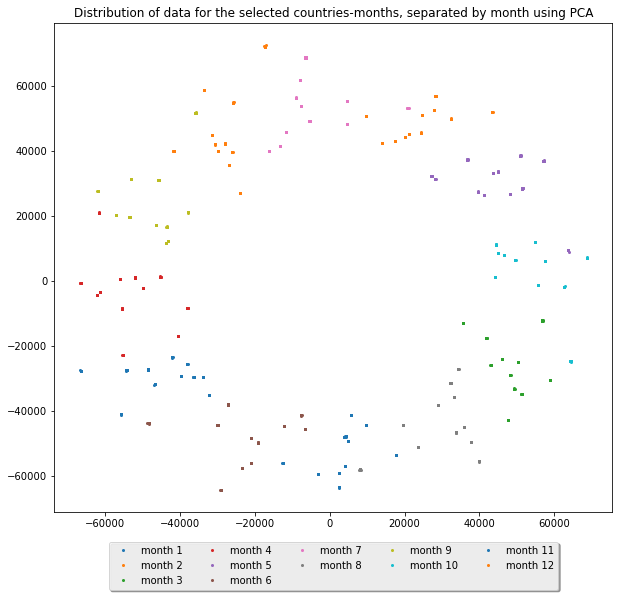

In [17]:
show_by_months = True
selected_months = np.arange(1,13)
show_by_countries = False
selected_countries = np.arange(1,number_of_countries)
plot_pca_distribution_per_country(Train_Input, 
                                      show_by_months, selected_months,
                                      show_by_countries, selected_countries)

### Distribution of data by country 

The selected Months are :  [ 1  2  3  4  5  6  7  8  9 10 11 12]
The selected Countries are :  [1 2 3 4]


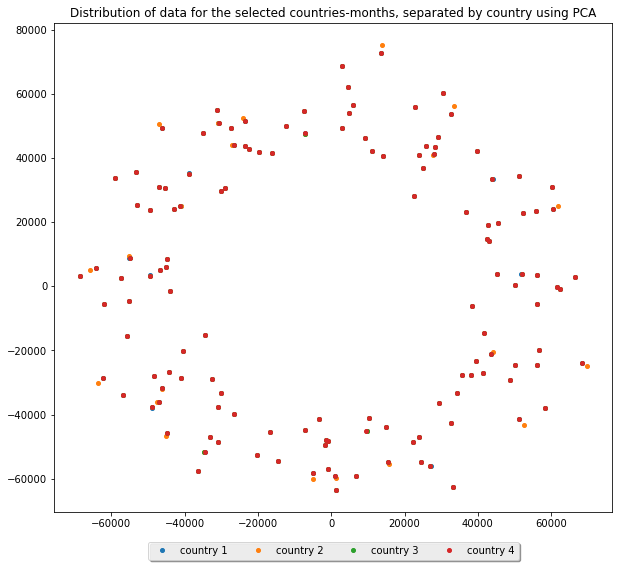

In [18]:
show_by_months = False
selected_months = np.arange(1,13)
show_by_countries = True
selected_countries = np.arange(1,5)
plot_pca_distribution_per_country(Train_Input, 
                                      show_by_months, selected_months,
                                      show_by_countries, selected_countries)

One can see that the separation between months is almost perfect using a PCA, we can see the different classes. When we try to do the same with countries we can see that it's very difficult to see any separation between the points. We explain this behavior by the fact that our data is highly dependent on the weather and then on the months. 

# V. Classification

## Split the data :

In order to evaluate properly our model, we need to split the dataset into (X_train, Y_train) and (X_validation, Y_validation).

-> (X_train, Y_train) is used as a training dataset for our model.

-> (X_validation, Y_validation) is used to evaluate the trained model.

In [19]:
## Variables for our study :
validation_size = 0.20
seed = 7
num_folds = 10

## split the data :
# Note : we need to remove the Id-cells
X_train, X_validation, Y_train, Y_validation = train_test_split(Train_Input.iloc[:,1:], Train_Outputs.iloc[:,1], \
                                                                test_size=validation_size, random_state=seed)

# Get an idea about the sizes :
print('X_train shape is ', X_train.shape)
print('Y_train shape is ', Y_train.shape)
print('X_validation shape is ', X_validation.shape)
print('Y_validation shape is ', Y_validation.shape)

X_train shape is  (8127, 122)
Y_train shape is  (8127,)
X_validation shape is  (2032, 122)
Y_validation shape is  (2032,)


## Algorithms :

We will evaluate the performance of different algorithms, and compare them in order to choose the best one.

In [20]:
## List of classification agorithms to try first :
pipelines = []

# SVM algorithm with different kernels : rbf, linear, polynomial and sigmoid :
pipelines.append(('ScaledSVM_rbf', Pipeline([('Scaler', StandardScaler()),('SVM_rbf', svm.SVC(kernel='rbf'))])))
pipelines.append(('ScaledSVM_linear', Pipeline([('Scaler', StandardScaler()),('SVM_linear', svm.SVC(kernel='linear'))])))
pipelines.append(('ScaledSVM_sigmoid', Pipeline([('Scaler', StandardScaler()),('SVM_sigmoid', svm.SVC(kernel='sigmoid'))])))
# Random forest :
pipelines.append(('ScaledRF', Pipeline([ ('Scaler', StandardScaler()),('RF', RandomForestClassifier()) ])))
# ExtraTrees classifier :
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
#   radient Boosting classifier :                                  
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
# K_NN algorithm :
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier(n_neighbors=100))])))
# XGboost
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBClassifier())])))

In order to evaluate the algorithms we use cross-validation (k-fold) the number of folds is 10 :

Note : we introduce the variable Compare_algorithms=False, if the user wants to see the results of all the algorithms please set his value to True.

In [21]:
Compare_algorithms = False

if Compare_algorithms :
    %%time
    results = []
    names = []
    for name, model in pipelines:

        kfold = KFold(n_splits=num_folds, random_state=seed)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'roc_auc')
        results.append(cv_results)
        names.append(name)

        print( "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) )

#### Campare the algorithms :

In [22]:
if Compare_algorithms :
    fig = plt.figure()
    fig.suptitle('Scaled Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    fig.set_size_inches(15,7)
    plt.show()

### Improve the accuracy - Finetunning the parameters :


Build a function using grid search in order to find the best parameters specified in 'params' for a given model 'my_model'.

In [23]:
'''
Inputs :
    - my_model : the model to use
    - params : the parameters to finetune
    
Outputs :
    The performance of each parameters, and prints the best parameters to use.
'''
def tune_parameters(my_model, params, X_train, Y_train, seed, split_number=5, print_=True):
    scaler = StandardScaler().fit(X_train)
    rescaledX = scaler.transform(X_train)
    kfold = KFold(n_splits=split_number, random_state=seed)
    grid = GridSearchCV(estimator=my_model, param_grid=params, scoring='roc_auc', cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    if print_ :
        for mean, stdev, param in zip(means, stds, params):
            print("%f (%f) with: %r" % (mean, stdev, param))
        
    return grid_result.best_score_, grid_result.best_params_

Finetuning all the parameters at once took us a long time on the local machine, this step needs strong CPUs on the machine.

In our code we introduce the choice between finetuning all the parameters at once by letting Strong_CPU=True otherwise we will finetune each parameters in a single run of the function tune_parameters.

In [24]:
'''
Useful function for our greedy parameter search

Goal : Transforms the values of a dictionary to a list-type
'''

def transform_values_into_list(Mydict):
    
    for key in Mydict :
        if isinstance(Mydict[key], (list))==False  :            
            Mydict[key] = [Mydict[key]]
    return Mydict        

'''
##Safety check :

Mydict = {'a': 1233, 'b': [2, 3]}
print(transform_into_array(Mydict))
'''

"\n##Safety check :\n\nMydict = {'a': 1233, 'b': [2, 3]}\nprint(transform_into_array(Mydict))\n"

In [25]:
#Set Tune_param to True if you want to perform a gridsearch :
Tune_param = False
#Set Strong_CPU to true if you want to perform a grid search for all the parameters at once otherwise 
#it will performs a greedy search
Strong_CPU = False

if Tune_param :
    
    my_model =  XGBClassifier()

    if Strong_CPU :
        param_grid = {
                    'max_depth':[8, 9, 10, 11],
                    'min_child_weight':np.arange(2,4),
                    'gamma':[i/10.0 for i in range(0,4)],
                    }
        best_accuracy, Best_param = tune_parameters(my_model, param_grid, X_train, Y_train, seed) 


    if not Strong_CPU :
            # Check the best param for 'max_depth' :
            best_score, greedy_param = tune_parameters(my_model, {'max_depth':[8, 9, 10, 11]}, X_train, Y_train, seed, print_=False) 
            greedy_param = transform_values_into_list(greedy_param)
            print('We get the best score with max_depth :', greedy_param, 'the accuracy is :', best_score)

            # Check the best param for 'min_child_weight' :
            greedy_param.update({'min_child_weight':np.arange(2,4)})
            best_score, greedy_param = tune_parameters(my_model, greedy_param, X_train, Y_train, seed, print_=False) 
            greedy_param = transform_values_into_list(greedy_param)
            print('We get the best score with max_depth :', greedy_param, 'the accuracy is :', best_score)

            # Check the best param for 'gamma' :
            greedy_param.update({'gamma':[i/10.0 for i in range(0,4)]})
            best_score, greedy_param = tune_parameters(my_model, greedy_param, X_train, Y_train, seed, print_=False) 
            greedy_param = transform_values_into_list(greedy_param)
            print('We get the best score with max_depth :', greedy_param, 'the accuracy is :', best_score)
        
            Best_param = greedy_param

## Get the Finale model :

In [26]:
Best_param = {'gamma': 0.0, 'max_depth': 10, 'min_child_weight': 2}
Optimized_Model = Pipeline([('Scaler', StandardScaler()),('XGB', XGBClassifier(gamma=0.0, max_depth=10, min_child_weight=2))])

Train the model on the complete dataset :

In [27]:
Optimized_Model.fit(X_train, Y_train)

Pipeline(steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('XGB', XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=2, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))])

Results on the validation set :

In [28]:
pred = Optimized_Model.predict(X_validation)

print('the accuracy is : ', metrics.accuracy_score(Y_validation, pred, normalize=True, sample_weight=None))
print('the precision score is :', metrics.precision_score(Y_validation, pred))
print('the recall score is :', metrics.recall_score(Y_validation, pred))
print('the roc-auc score is :', metrics.roc_auc_score(Y_validation, pred))

the accuracy is :  0.765255905512
the precision score is : 0.71376146789
the recall score is : 0.547887323944
the roc-auc score is : 0.714942149113


Train the model on the entire dataset :

In [29]:
Optimized_Model.fit(Train_Input.iloc[:,1:], Train_Outputs.iloc[:,1])

Pipeline(steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('XGB', XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=2, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))])

In [30]:
# save the model to disk
#filename = 'finalized_model_PredictionOfCrudeOilTrend.sav'
#dump(Optimized_Model, open(filename, 'wb'))